In [ ]:
################################################################################
# Pennycress growout2 field  phenotypes vs. Pete's pod-scans association
# CRA-08162024
################################################################################

In [3]:
rm(list=ls())
setwd("")
library(tidyverse)
library(ggplot2)
library(readxl)

In [4]:
# This is the phenotype data that I curated with starting data from Mirko
merged_pheno <- read.csv('../data/genotypes/external_phenotypes.csv', header=T)
dim(merged_pheno)
head(merged_pheno)
colnames(merged_pheno)

[1] 1130   52

,genotype,plot_id,block,row,col,replicate,loc,year,plot_rating_at_maturity,tillers,⋯,tgw,seed_area,seed_width,seed_length,lw_ratio,New_Name,Old_Accession_Name,Latitude,Longitude,Growth_type
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,15_06,283,1,13,10,2,WIU,2023,1.1838064,1.7136298,⋯,1.0274990,1.738899,1.385200,1.805669,1.306014,Ta0022_S,15-6,48.379980000000003,-114.21333,S
2,15_06,248,1,8,9,1,WIU,2023,1.5103532,1.6364631,⋯,0.9693692,1.643680,1.348836,1.764725,1.311921,Ta0022_S,15-6,48.379980000000003,-114.21333,S
3,15_06,142,1,22,5,3,WIU,2023,1.7317698,1.4759249,⋯,0.9929268,1.671109,1.358044,1.776480,1.312224,Ta0022_S,15-6,48.379980000000003,-114.21333,S
4,18_01,121,1,1,5,1,WIU,2023,1.2950822,1.6848019,⋯,0.9843027,1.721959,1.369202,1.811934,1.325845,Ta0025_W,18-1,43.802669999999999,-70.824330000000003,W
5,18_01,531,1,21,18,3,WIU,2023,0.4015745,0.6752764,⋯,1.0119531,1.706287,1.375087,1.788589,1.304220,Ta0025_W,18-1,43.802669999999999,-70.824330000000003,W
6,18_01,615,1,15,21,2,WIU,2023,1.0291168,1.1517739,⋯,1.0503108,1.730002,1.382848,1.807084,1.310565,Ta0025_W,18-1,43.802669999999999,-70.824330000000003,W


[1] "genotype"                      "plot_id"                      
 [3] "block"                         "row"                          
 [5] "col"                           "replicate"                    
 [7] "loc"                           "year"                         
 [9] "plot_rating_at_maturity"       "tillers"                      
[11] "floral_branch"                 "stem_branch"                  
[13] "lodging"                       "stem_lesions"                 
[15] "pod_black_spots"               "days_to_50_percent_emergence" 
[17] "days_to_100_percent_emergence" "days_to_maturity"             
[19] "days_to_budding"               "days_to_1st_flower"           
[21] "days_to_50_percent_flower"     "days_to_100_percent_flower"   
[23] "avg_rosette"                   "c24_0_methyl_lignocerate"     
[25] "c22_0_methyl_behenate"         "c16_0_methyl_palmitate"       
[27] "other"                         "moisture"                     
[29] "c20_1_methyl_eicosenoate"      "c18_1_methyl_oleate"          
[31] "yield_kg"                      "c18_3_methyl_linolenate"      
[33] "c18_2_methyl_linoleate"        "c22_1_methyl_erucate"         
[35] "sinigrin_umol_g"               "oil_percent_dwb"              
[37] "f5"                            "f4"                           
[39] "f0"                            "f1"                           
[41] "f3"                            "f2"                           
[43] "tgw"                           "seed_area"                    
[45] "seed_width"                    "seed_length"                  
[47] "lw_ratio"                      "New_Name"                     
[49] "Old_Accession_Name"            "Latitude"                     
[51] "Longitude"                     "Growth_type"

In [5]:
# Podscan data sent by Pete
pod_scans <- read.csv('./data/measurements.csv', header=T)
dim(pod_scans)
head(pod_scans)
colnames(pod_scans)

[1] 12252     5

,image_name,seed_count,wing.area,env.area,seed.area
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,pred_862-ref-ISU_002-rep_1-W-CORE_0.png,0,0.03055549,0.0000000,0.0000000
2,pred_862-ref-ISU_002-rep_1-W-CORE_1.png,0,0.02724009,0.0000000,0.0000000
3,pred_862-ref-ISU_002-rep_1-W-CORE_2.png,12,0.98646756,0.3473470,0.1468993
4,pred_862-ref-ISU_002-rep_1-W-CORE_3.png,12,0.95385114,0.3282431,0.1416485
5,pred_862-ref-ISU_002-rep_1-W-CORE_4.png,12,1.01338507,0.3138524,0.1460033
6,pred_862-ref-ISU_002-rep_1-W-CORE_5.png,9,0.93109133,0.3089062,0.1325625


[1] "image_name" "seed_count" "wing.area"  "env.area"   "seed.area"

In [7]:
# Obtain genotype names from the image names
tmp <- sapply(pod_scans$image_name, function(x){
    y <- unlist(str_split(x, '-'))[3]
    return(y)
})
names <- tmp %>% as.data.frame() 
nrow(names)
pod_scans$genotype <- names[,1]
head(pod_scans)
# There are many names with NA values. These are from other experiments (transgenic) in the same field as per Bill and Win

[1] 12252

,image_name,seed_count,wing.area,env.area,seed.area,genotype
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,pred_862-ref-ISU_002-rep_1-W-CORE_0.png,0,0.03055549,0.0000000,0.0000000,ISU_002
2,pred_862-ref-ISU_002-rep_1-W-CORE_1.png,0,0.02724009,0.0000000,0.0000000,ISU_002
3,pred_862-ref-ISU_002-rep_1-W-CORE_2.png,12,0.98646756,0.3473470,0.1468993,ISU_002
4,pred_862-ref-ISU_002-rep_1-W-CORE_3.png,12,0.95385114,0.3282431,0.1416485,ISU_002
5,pred_862-ref-ISU_002-rep_1-W-CORE_4.png,12,1.01338507,0.3138524,0.1460033,ISU_002
6,pred_862-ref-ISU_002-rep_1-W-CORE_5.png,9,0.93109133,0.3089062,0.1325625,ISU_002


In [8]:
# Checking the variance within and across genotypes
pod_scans_avg <- pod_scans %>% 
filter(!is.na(genotype)) %>% 
filter(genotype %in% merged_pheno$genotype) %>% 
group_by(genotype) %>% 
summarise(across(all_of(colnames(pod_scans)[2:5]), median))
dim(pod_scans_avg)
head(pod_scans_avg)

[1] 213   5

genotype,seed_count,wing.area,env.area,seed.area
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
15_06,10.0,0.8222385,0.3899634,0.1497488
19_1,10.0,1.1085820,0.4317375,0.1677595
950011,10.0,0.7772386,0.3655548,0.1400356
950016,10.0,0.7521490,0.3153040,0.1366664
950021,10.5,0.8594517,0.3197843,0.1430373
950028,10.0,0.8871398,0.3319438,0.1497846


In [14]:
merged_pheno_avg <- merged_pheno %>% filter(!is.na(genotype)) %>% 
dplyr::select(genotype, tgw, yield_kg, oil_percent_dwb) %>% 
filter(genotype %in% pod_scans_avg$genotype) %>% 
group_by(genotype) %>% 
summarise(across(all_of(c('tgw', 'yield_kg', 'oil_percent_dwb')), mean))
# summarise(across(all_of(c('tgw', 'yield_kg', 'oil_percent_dwb')), median))
dim(merged_pheno_avg)
head(merged_pheno_avg)

[1] 213   4

genotype,tgw,yield_kg,oil_percent_dwb
<chr>,<dbl>,<dbl>,<dbl>
15_06,0.9965983,0.6649738,30.44751
19_1,1.1227668,0.3749942,30.46693
950011,0.9804814,0.4836151,28.07050
950016,1.0226576,0.5414039,29.35937
950021,1.1926864,0.3435282,27.01516
950028,1.1564538,0.2772536,30.11251


In [15]:
stopifnot(all(pod_scans_avg$genotype == merged_pheno_avg$genotype))
pods_pheno_avg <- merge(merged_pheno_avg, pod_scans_avg, by='genotype')
dim(pods_pheno_avg)
head(pods_pheno_avg)

[1] 213   8

,genotype,tgw,yield_kg,oil_percent_dwb,seed_count,wing.area,env.area,seed.area
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15_06,0.9965983,0.6649738,30.44751,10.0,0.8222385,0.3899634,0.1497488
2,19_1,1.1227668,0.3749942,30.46693,10.0,1.1085820,0.4317375,0.1677595
3,950011,0.9804814,0.4836151,28.07050,10.0,0.7772386,0.3655548,0.1400356
4,950016,1.0226576,0.5414039,29.35937,10.0,0.7521490,0.3153040,0.1366664
5,950021,1.1926864,0.3435282,27.01516,10.5,0.8594517,0.3197843,0.1430373
6,950028,1.1564538,0.2772536,30.11251,10.0,0.8871398,0.3319438,0.1497846


In [30]:
panel.smooth.lm <- function(x, y) {
  points(x, y, pch = 19, col = "blue")  
  abline(lm(y ~ x), col = "red", lwd = 2)  
}

panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor = 1.5) {
  usr <- par("usr")
  on.exit(par(usr = usr))
  par(usr = c(0, 1, 0, 1))
  r <- cor(x, y, use = "complete.obs")  
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste0(prefix, txt, cex=10)
  text(0.5, 0.5, txt)  
}

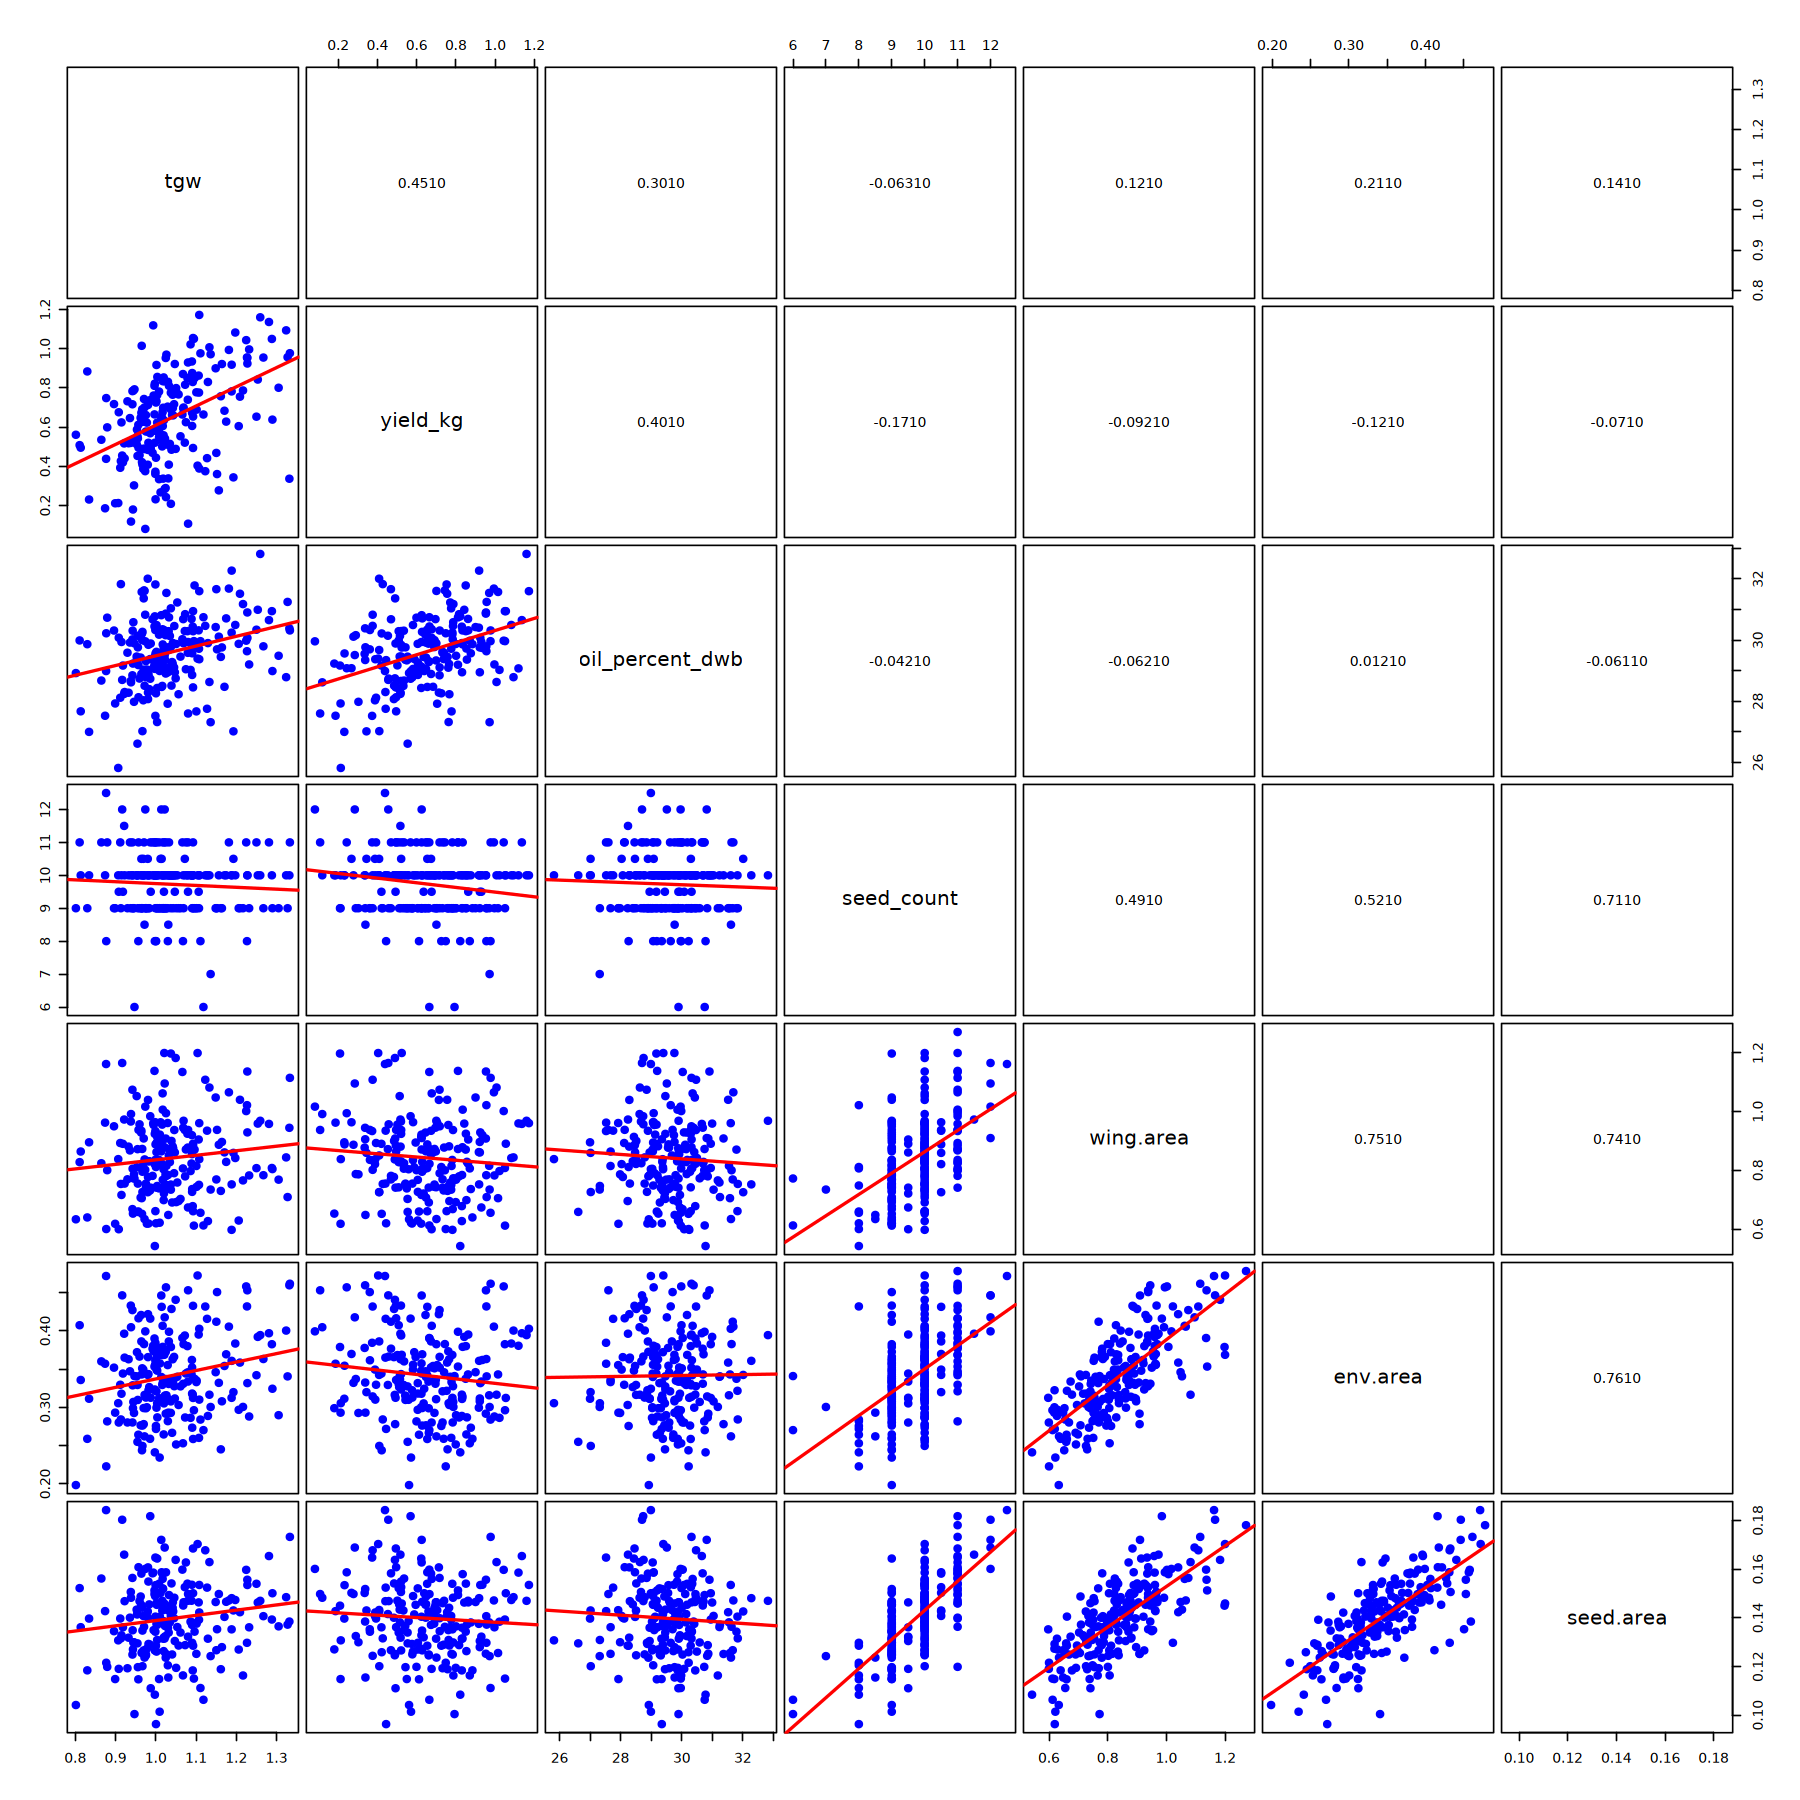

In [31]:
options(repr.plot.width=15, repr.plot.height=15)
pairs(pods_pheno_avg[,-1],
      lower.panel = function(x, y) panel.smooth.lm(x, y),  
      upper.panel = function(x, y) panel.cor(x, y, cex.cor = 2),  
      labels = colnames(pods_pheno_avg)[-1], 
      cex.labels = 1.5,  
      gap = 0.5)  


	Pearson's product-moment correlation

data:  pods_pheno_avg$tgw and pods_pheno_avg$env.area
t = 3.1322, df = 210, p-value = 0.001982
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0787570 0.3364354
sample estimates:
     cor 
0.211264 


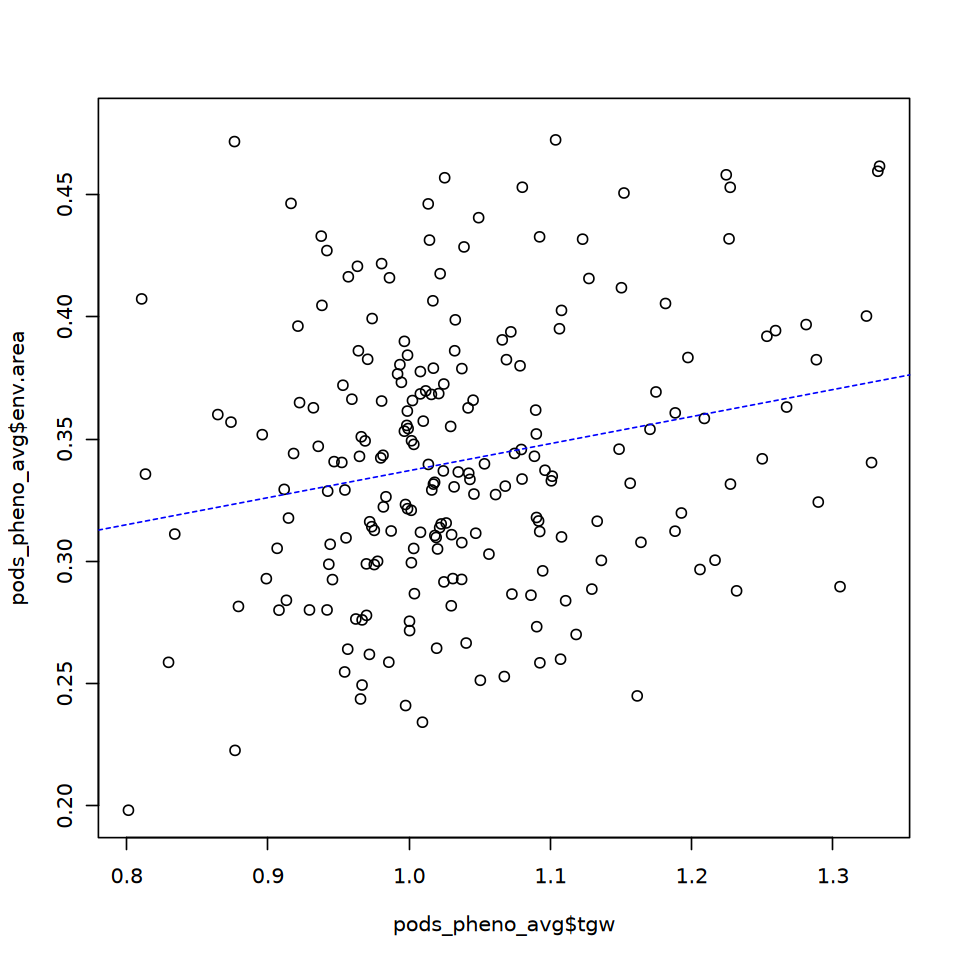

In [32]:
options(repr.plot.width=8, repr.plot.height=8)
plot(pods_pheno_avg$tgw, pods_pheno_avg$env.area)
abline(lm(pods_pheno_avg$env.area~pods_pheno_avg$tgw), lty=2, col='blue')
cor.test(pods_pheno_avg$tgw, pods_pheno_avg$env.area)

In [ ]:
# END